In [1]:
# Here I am testing a new Hamiltonian which turns on and off smoother than the sin^2 one we have been using so far

# Standard library imports
import os
import sys

# Third-party imports
import numpy as np
import pandas as pd

# Set the path manually or relative to the notebook
# Assume notebook is in "workflow", and "src" is its parent
current_dir = os.getcwd()  # or use `os.path.dirname(os.path.abspath("your_notebook_name.ipynb"))`
src_dir = os.path.dirname(current_dir)
sys.path.append(src_dir)  # Add 'src' to the path

# Local import
from utils.LandauerErasure_functions import *
from utils.operators import *




In [2]:
def H_ERASURE(t, tp, eps0, eps_max, n, shift=True, sta=False):

    # Calculate the mixing angle theta
    theta = np.pi * ((t / tp) - 1)

    # Calculate the time-dependent energy splitting
    eps_of_t = eps0 + (eps_max - eps0) * (np.sin(np.pi * t / (n * tp)))**2

    # Calculate the time dependent coefficients for sz and sx operators
    fz = 0.5 * eps_of_t * np.cos(theta)
    fx = 0.5 * eps_of_t * np.sin(theta)

    # define the Hamiltonian
    h  = fz * sz() + fx * sx() 
    
    # if the shift is applied, add the shift term to the Hamiltonian
    if shift:
        # Calculate the shift required for ground state energy = 0 at all times
        eta = np.sqrt(fz**2 + fx**2)
        # add the shift to the hamiltonian with the identity operator
        h += eta * (sz())**2

    # if the shortcut to adiabaticity is applied, add the STA term
    if sta:
        if t>0 and t<tp: # apply it instantaneously at t=0 and turn it off at t=tp
        # ramp = sta_ramp(t, tp) # ramp function for STA
            ramp = 1 
            h += ramp*(np.pi / (2 * tp)) * sy() 

    # return the Hamiltonian
    return h

In [26]:

def H_ERASURE_smooth(t, tp, eps0, eps_max, n, shift=True, sta=False, ramp_power=1.5):
    """
    Hamiltonian for smooth erasure protocol with tunable ramp shape.

    Parameters:
    - t: float, time
    - tp: float, total protocol duration
    - eps0: float, initial/final energy
    - eps_max: float, maximum energy in the middle
    - n: int, number of sin² oscillations in base modulation
    - shift: bool, add ground state energy shift
    - sta: bool, apply STA term (disabled by default)
    - ramp_power: float, power to raise the sin function for smoother turn-on/off
                  Higher values = flatter edges and steeper center
    """

    # Tunable ramp function: sin^ramp_power(pi * t / tp)
    ramp = np.sin(np.pi * t / tp)**ramp_power
    # Base energy modulation
    sin2_term = (np.sin(np.pi * t / (n * tp)))**2
    eps_of_t = eps0 + (eps_max - eps0) * sin2_term * ramp

    # Mixing angle for control direction
    theta = np.pi * ((t / tp) - 1)

    # Pauli terms
    fz = 0.5 * eps_of_t * np.cos(theta)
    fx = 0.5 * eps_of_t * np.sin(theta)

    # Hamiltonian construction
    h = fz * sz() + fx * sx()

    # Optional: zero ground state energy shift
    if shift:
        eta = np.sqrt(fz**2 + fx**2)
        h += eta * (sz()**2)

    # if the shortcut to adiabaticity is applied, add the STA term
    if sta:
        if t>0 and t<tp: # apply it instantaneously at t=0 and turn it off at t=tp
        # ramp = sta_ramp(t, tp) # ramp function for STA
            ramp = 1 
            h += ramp*(np.pi / (2 * tp)) * sy() 

    return h



In [29]:
# lets plot the eigenvalues of the Hamiltonian over some protocol time

tlist = np.arange(0, 1, 0.01)  # time list from 0 to 1
ground = []
excited = []

ground_smooth = []
excited_smooth = []

ground_smooth2 = []
excited_smooth2 = []

ground_smooth3 = []
excited_smooth3 = []

# Base protocol
for t in tlist:
    h = H_ERASURE(t, 1, 0.1, 1, 1, shift=True, sta=False)
    eigenvalues = np.linalg.eigvalsh(h)
    ground.append(eigenvalues[0])
    excited.append(eigenvalues[1])

    # Smooth protocol with ramp_power=2 (default)
    h_smooth = H_ERASURE_smooth(t, 1, 0.1, 1, 1, shift=True, sta=False, ramp_power=5)
    eigenvalues_smooth = np.linalg.eigvalsh(h_smooth)
    ground_smooth.append(eigenvalues_smooth[0])
    excited_smooth.append(eigenvalues_smooth[1])

    # Smooth protocol with ramp_power=2 (default)
    h_smooth = H_ERASURE_smooth(t, 1, 0.1, 1, 1, shift=True, sta=False, ramp_power=3)
    eigenvalues_smooth = np.linalg.eigvalsh(h_smooth)
    ground_smooth2.append(eigenvalues_smooth[0])
    excited_smooth2.append(eigenvalues_smooth[1])


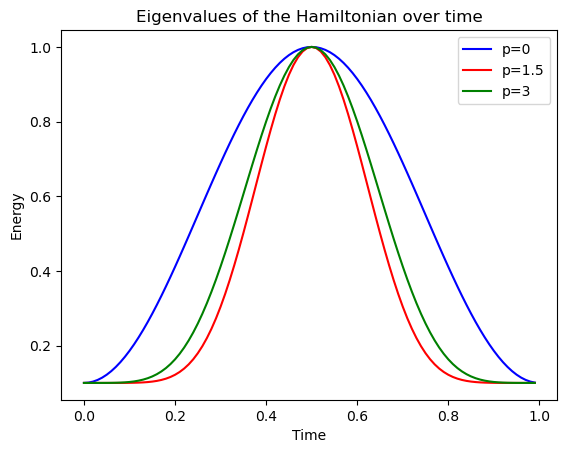

In [30]:
# plt.plot(tlist, ground, label='Ground')
plt.plot(tlist, excited, 'b-', label='p=0')
plt.plot(tlist, excited_smooth,'r-', label='p=1.5')
plt.plot(tlist, excited_smooth2,'g-',label='p=3')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Eigenvalues of the Hamiltonian over time')
plt.legend()
# plt.grid()
plt.show()